<a href="https://colab.research.google.com/github/Manirangasamy/MyRLab/blob/master/covid19_pneumonia_xray_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


## Clone Dataset

In [2]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 37.82 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [4]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(376).jpg', 'COVID19(333).jpg', 'COVID19(99).jpg', 'COVID19(365).jpg', 'COVID19(245).jpg', 'COVID19(246).jpg', 'COVID19(123).jpg', 'COVID19(553).jpg', 'COVID19(32).jpg', 'COVID19(574).jpg']
['NORMAL(1465).jpg', 'NORMAL(1573).jpg', 'NORMAL(740).jpg', 'NORMAL(528).jpg', 'NORMAL(591).jpg', 'NORMAL(1177).jpg', 'NORMAL(1288).jpg', 'NORMAL(1218).jpg', 'NORMAL(1211).jpg', 'NORMAL(346).jpg']
['COVID19(153).jpg', 'COVID19(375).jpg', 'COVID-19 (522).jpg', 'COVID-19 (457).jpg', 'COVID-19 (745).jpg', 'COVID19(294).jpg', 'COVID19(490).jpg', 'COVID19(79).jpg', 'COVID19(215).jpg', 'COVID19(455).jpg']
['NORMAL(264).jpg', 'NORMAL(255).jpg', 'NORMAL(1384).jpg', 'NORMAL(539).jpg', 'NORMAL(1065).jpg', 'NORMAL(1292).jpg', 'NORMAL(443).jpg', 'NORMAL(1069).jpg', 'NORMAL(485).jpg', 'NORMAL(1344).jpg']


In [5]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))

train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


## Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(376).jpg', '/content/datasets/Data/train/COVID19/COVID19(333).jpg', '/content/datasets/Data/train/COVID19/COVID19(99).jpg', '/content/datasets/Data/train/COVID19/COVID19(365).jpg', '/content/datasets/Data/train/COVID19/COVID19(245).jpg', '/content/datasets/Data/train/COVID19/COVID19(246).jpg', '/content/datasets/Data/train/COVID19/COVID19(123).jpg', '/content/datasets/Data/train/COVID19/COVID19(553).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1465).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1573).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(740).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(528).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(591).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1177).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1288).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1218).jpg']


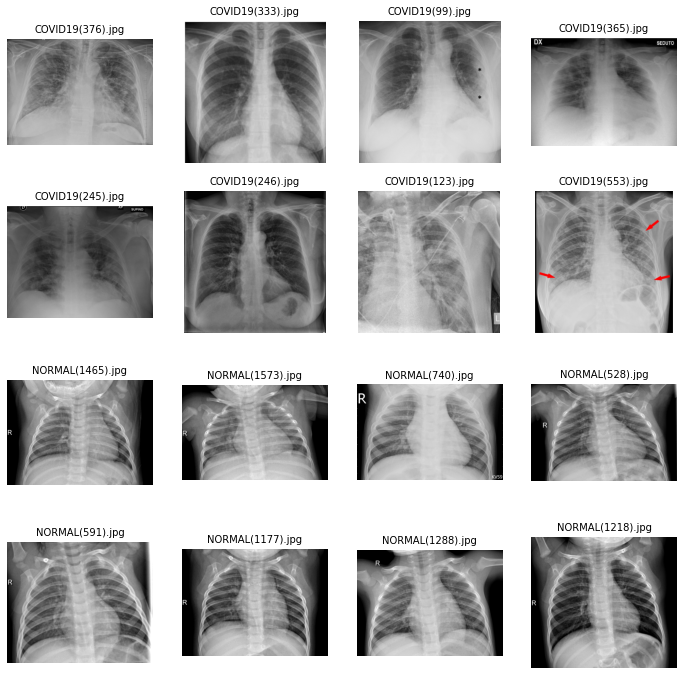

In [6]:
# plot x-ray images 
import matplotlib.image as mpimg

# row and columns
nrows = 4
ncols = 4

flg = plt.gcf()
flg.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic+ next_normal_pic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()


## Generating Training, Validation & Testing Batches

In [7]:
# Generator for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


# Generator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

## Build CNN Model

In [10]:
model = Sequential()

# add the convolution layer
# filter, size of filters, padding, activation_function, input_shape

model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

#pooling layer

model.add(MaxPool2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))
# add another convolution layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
#place a dropout layer
model.add(Dropout(0.5))
#Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of node, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
#0.5 drop out rate is recommended , half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

## Compile & Train Model

In [11]:
# comple the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
## train the model
history = model.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 79s 1s/step - loss: 1.0076 - accuracy: 0.7474 - val_loss: 0.2618 - val_accuracy: 0.9406
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.2417 - accuracy: 0.9068 - val_loss: 0.1950 - val_accuracy: 0.9406
Epoch 3/30
46/46 [==============================] - 47s 1s/step - loss: 0.1791 - accuracy: 0.9317 - val_loss: 0.1859 - val_accuracy: 0.9719
Epoch 4/30
46/46 [==============================] - 48s 1s/step - loss: 0.1465 - accuracy: 0.9524 - val_loss: 0.1546 - val_accuracy: 0.9656
Epoch 5/30
46/46 [==============================] - 48s 1s/step - loss: 0.1505 - accuracy: 0.9503 - val_loss: 0.1143 - val_accuracy: 0.9563
Epoch 6/30
46/46 [==============================] - 48s 1s/step - loss: 0.1399 - accuracy: 0.9579 - val_loss: 0.1380 - val_accuracy: 0.9594
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1161 - accuracy: 0.9648 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 8/30
46/46 [==

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

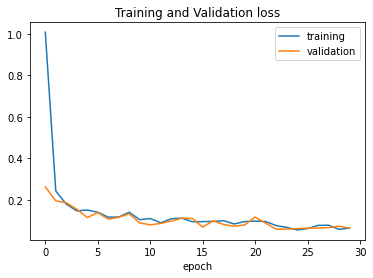

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

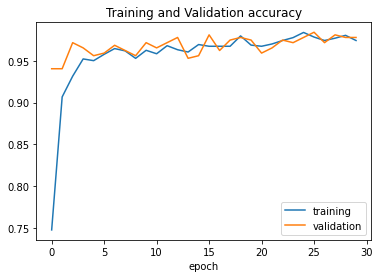

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc : {} test loss : {}'.format(test_acc,test_loss))

16/16 [==============================] - 11s 674ms/step - loss: 0.1063 - accuracy: 0.9504
test acc : 0.9504132270812988 test loss : 0.10628120601177216


In [28]:
# test your model with some images from the local system to predict COVID or not
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes == 0:
    print('COVID19')
  else:
    print('Normal')

Saving 222-1.jpeg to 222-1 (1).jpeg
Saving 222-2.jpg to 222-2 (1).jpg
Saving 222.jpeg to 222 (1).jpeg
Saving 777-1.jpeg to 777-1 (1).jpeg
Saving 777-2.jpg to 777-2 (1).jpg
Saving 777-3.jpeg to 777-3 (1).jpeg
Saving 777.jpeg to 777 (1).jpeg
/content/222-1.jpeg
222-1.jpeg
Normal
/content/222-2.jpg
222-2.jpg
Normal
/content/222.jpeg
222.jpeg
Normal
/content/777-1.jpeg
777-1.jpeg
COVID19
/content/777-2.jpg
777-2.jpg
COVID19
/content/777-3.jpeg
777-3.jpeg
COVID19
/content/777.jpeg
777.jpeg
Normal


In [29]:
model.save('model.h5')

In [32]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      0.74      0.85       167
           1       0.88      1.00      0.94       317

    accuracy                           0.91       484
   macro avg       0.94      0.87      0.89       484
weighted avg       0.92      0.91      0.91       484



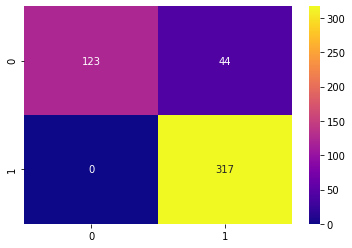

In [33]:
y_actual =[]
y_test =[]
 
for i in os.listdir("/content/datasets/Data/test/COVID19"):
  img = image.load_img("/content/datasets/Data/test/COVID19/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)
 
 
for i in os.listdir("/content/datasets/Data/test/NORMAL"):
  img = image.load_img("/content/datasets/Data/test/NORMAL/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)
 
 
y_actual = np.array(y_actual)
y_test = np.array(y_test)
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
 
import seaborn as sns
sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)
 
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test))